In [1]:
#library import
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

In [2]:
df= pd.read_csv('./Data/Raw/Nepali_dataset_unbal.csv')
df.head()

,Text,Aspect Term,Sentiment,Polarity
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,जोगाउन को लागि,GENERAL,0
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,लखेटनु पछ,GENERAL,1
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,ससकृती ध्वस्त पार्ने,GENERAL,1
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,भुमाफिया,GENERAL,1
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,बेची सके,GENERAL,1


In [3]:
df_copy= df.copy()
df_copy.loc[:,'Sentiment'].value_counts()


Sentiment
GENERAL      2259
PROFANITY     333
VIOLENCE      267
Name: count, dtype: int64

In [4]:
df_copy.loc[:,'Sentiment':'Polarity'].value_counts()

Sentiment  Polarity
GENERAL    1           1358
           0            901
PROFANITY  0            250
VIOLENCE   1            159
           0            108
PROFANITY  1             83
Name: count, dtype: int64

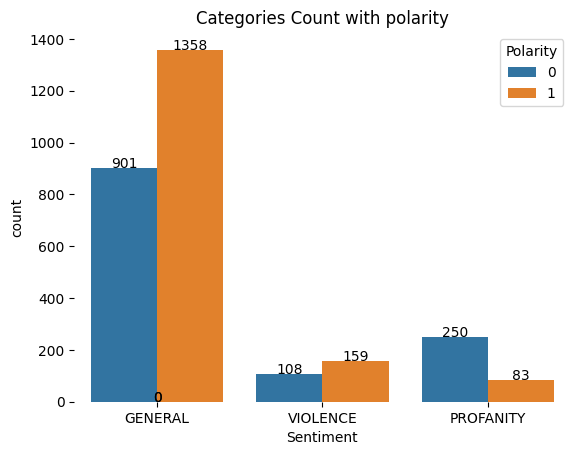

In [5]:
# Count Plot of Categories with Polarity
df_copy['Polarity'] = df_copy['Polarity'].astype('category')

ax= sns.countplot(x='Sentiment',hue='Polarity', data=df_copy)
plt.title('Categories Count with polarity')

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:d}'.format(int(p.get_height())), ha='center')
# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

## removing punctuation, lowering romans, and removing stopwords

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import string

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nepali_stopwords = stopwords.words('nepali')

[nltk_data] Downloading package punkt to /home/angel-
[nltk_data]     tamang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/angel-
[nltk_data]     tamang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df_copy= df.copy()

# Apply preprocessing: remove punctuation, stopwords removal and lowering to the 'Text' column
df_copy['Text'] = (
    df_copy['Text']
    .str.lower()               # Convert to lowercase
    .str.replace(f"[{string.punctuation}]", "")  # Remove punctuation
    .apply(lambda x: ' '.join([word for word in x.split() if word not in nepali_stopwords]))  # Remove Nepali stopwords
)

df_copy.head()

,Text,Aspect Term,Sentiment,Polarity
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,जोगाउन को लागि,GENERAL,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,लखेटनु पछ,GENERAL,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,ससकृती ध्वस्त पार्ने,GENERAL,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,भुमाफिया,GENERAL,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,बेची सके,GENERAL,1


## now checking vocabulary

In [8]:
from collections import Counter
texts = df_copy['Text']
all_words = " ".join(texts).split()

# Count word frequencies
word_counts = Counter(all_words)

# Get the 10 most common words
most_common_words = word_counts.most_common(10)

# Get the 10 least common words
least_common_words = word_counts.most_common()[:-11:-1]  # last 10 elements (reverse order)

# Print top 10 most common words
print("Top 10 most frequent words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Print top 10 least common words
print("\nTop 10 least frequent words:")
for word, freq in least_common_words:
    print(f"{word}: {freq}")

# Count unique words
unique_words = set(all_words)

# Vocabulary size
vocabulary_size = len(unique_words)
print(f"Vocabulary Size: {vocabulary_size}")

Top 10 most frequent words:
।: 2512
,: 672
हरु: 640
देश: 292
नेता: 286
रबि: 276
नेपाल: 259
सर: 235
जनता: 207
चोर: 203

Top 10 least frequent words:
दुबेर: 1
कुवा: 1
मिलिहाल्छ: 1
हिंग्सा: 1
सुद्दी: 1
टांग्नु: 1
भित्ता: 1
तारेर: 1
साँच्चि: 1
हेरुम: 1
Vocabulary Size: 8615


In [10]:
print(nepali_stopwords)

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [11]:
# Importing custom python script to transform Hate sentiment dataset's Output classes to single target class
from create_target_label import create_target_column

df_copy,label_encoder = create_target_column(df_copy, "Sentiment", "Polarity")

In [12]:
list(label_encoder.classes_)

['GENERAL_0',
 'GENERAL_1',
 'PROFANITY_0',
 'PROFANITY_1',
 'VIOLENCE_0',
 'VIOLENCE_1']

In [13]:
df_copy.head()

,Text,Aspect Term,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,जोगाउन को लागि,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,लखेटनु पछ,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,ससकृती ध्वस्त पार्ने,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,भुमाफिया,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,बेची सके,1


In [14]:
df_copy.drop("Aspect Term", axis=1, inplace=True)
df_copy.head()

,Text,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,1


In [15]:
# Exporting this cleaned text dataset to preprocessed
df_copy.to_csv("./Data/Preprocessed/Cleaned_Nepali_dataset.csv", index= False)

# Visualizing Embeddings

In [16]:
df_word2vec_scratch = pd.read_csv("./Data/Preprocessed/Word2vec_scratch_dataset.csv")
df_word2vec_scratch.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Target
0,0.009149,-0.007363,-0.071428,0.027589,-0.065159,0.101694,0.105503,0.152386,-0.099987,0.016332,...,0.054525,0.068828,-0.157016,0.110741,-0.012304,0.006192,0.058753,-0.128168,-0.057991,0
1,0.002482,0.000058,-0.042077,0.011284,-0.030093,0.054430,0.055231,0.077490,-0.053737,0.010759,...,0.025602,0.040370,-0.083347,0.058569,-0.006940,-0.000435,0.032125,-0.068946,-0.031247,1
2,0.001966,-0.007703,-0.066153,0.028400,-0.057853,0.103146,0.102186,0.154472,-0.103730,0.019518,...,0.051543,0.072960,-0.153814,0.113936,-0.013827,0.010765,0.059021,-0.132867,-0.060418,1
3,0.007659,-0.009294,-0.070562,0.028778,-0.065861,0.099898,0.106717,0.159997,-0.102938,0.016291,...,0.056416,0.072272,-0.162166,0.113751,-0.010432,0.005084,0.059549,-0.131307,-0.061424,1
4,0.005065,-0.006995,-0.054864,0.024895,-0.051617,0.080223,0.085325,0.127244,-0.087432,0.012062,...,0.047769,0.060087,-0.126974,0.089155,-0.008194,0.003055,0.053891,-0.109733,-0.051792,1
